In [4]:
import torch;
print(torch.__version__)
import torch;print(torch.cuda.is_available())
import torch;print(torch.cuda.device_count())

2.5.1
True
1


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

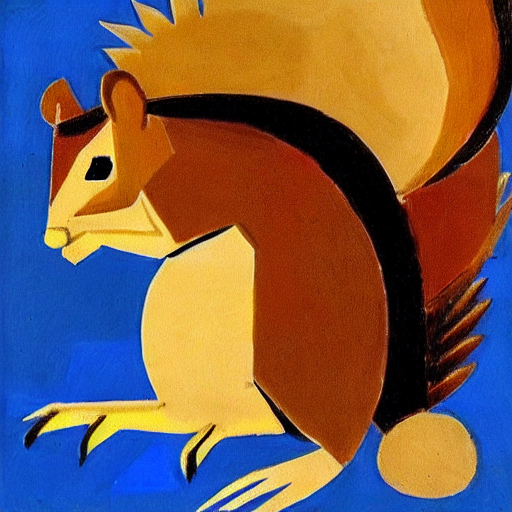

In [3]:

from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True)

pipeline.to("cuda")
image = pipeline("An image of a squirrel in Picasso style").images[0]
image


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

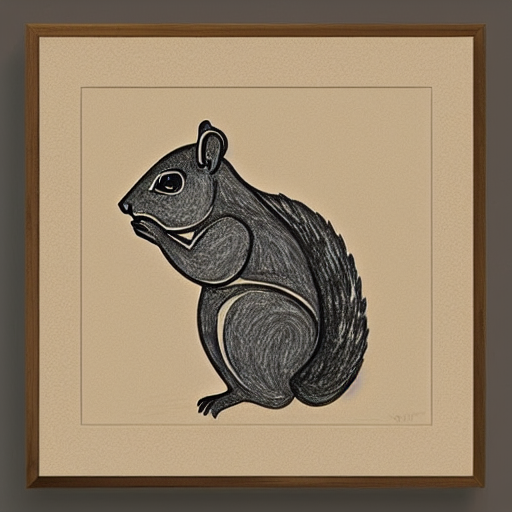

In [5]:

from diffusers import EulerDiscreteScheduler

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True)
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

pipeline.to("cuda")
image = pipeline("An image of a squirrel in Picasso style").images[0]
image


In [6]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id, use_safetensors=True)

model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('time_embedding_dim', None),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
            ('upsample_type', 'conv'),
            ('

In [7]:
import torch

torch.manual_seed(0)

noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [8]:
with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample

In [9]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_pretrained(repo_id)
scheduler

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.32.2",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [10]:
less_noisy_sample = scheduler.step(model_output=noisy_residual, timestep=2, sample=noisy_sample).prev_sample
less_noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [11]:
import PIL.Image
import numpy as np


def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

In [12]:
model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

  5%|███████▉                                                                                                                                                                 | 47/1000 [00:01<00:32, 29.48it/s]

'Image at step 50'

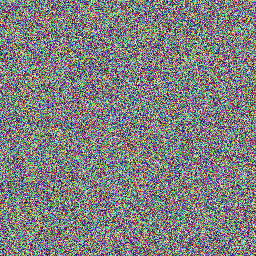

 10%|████████████████▋                                                                                                                                                        | 99/1000 [00:03<00:30, 29.61it/s]

'Image at step 100'

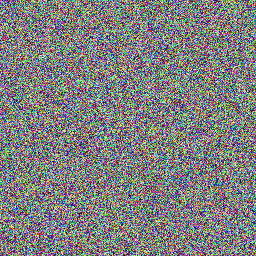

 15%|████████████████████████▋                                                                                                                                               | 147/1000 [00:05<00:28, 29.60it/s]

'Image at step 150'

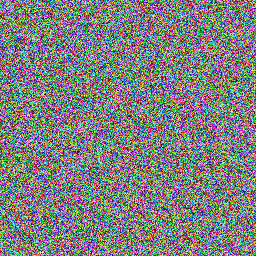

 20%|█████████████████████████████████▍                                                                                                                                      | 199/1000 [00:07<00:27, 29.57it/s]

'Image at step 200'

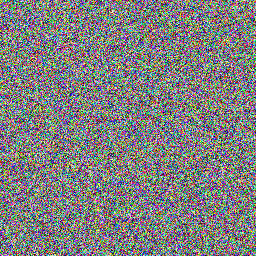

 25%|█████████████████████████████████████████▍                                                                                                                              | 247/1000 [00:08<00:25, 29.60it/s]

'Image at step 250'

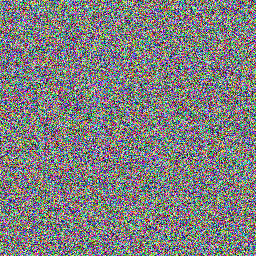

 30%|██████████████████████████████████████████████████▏                                                                                                                     | 299/1000 [00:10<00:23, 29.60it/s]

'Image at step 300'

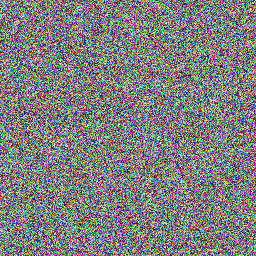

 35%|██████████████████████████████████████████████████████████▎                                                                                                             | 347/1000 [00:12<00:22, 29.61it/s]

'Image at step 350'

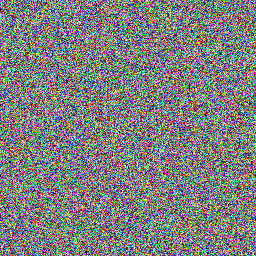

 40%|███████████████████████████████████████████████████████████████████                                                                                                     | 399/1000 [00:13<00:20, 29.61it/s]

'Image at step 400'

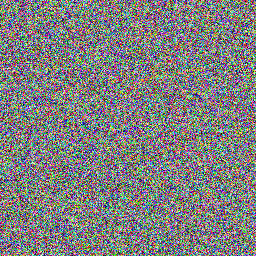

 45%|███████████████████████████████████████████████████████████████████████████                                                                                             | 447/1000 [00:15<00:18, 29.60it/s]

'Image at step 450'

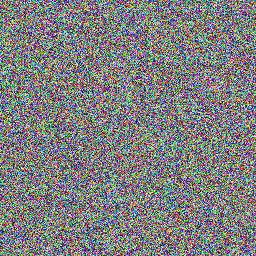

 50%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 499/1000 [00:17<00:16, 29.61it/s]

'Image at step 500'

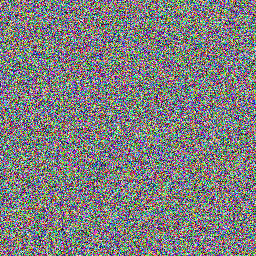

 55%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 547/1000 [00:18<00:15, 29.60it/s]

'Image at step 550'

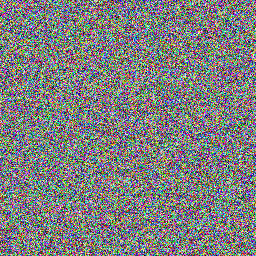

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 599/1000 [00:20<00:13, 29.60it/s]

'Image at step 600'

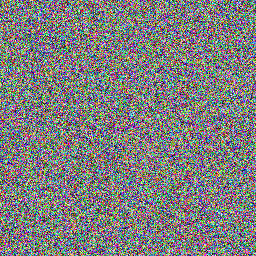

 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 647/1000 [00:22<00:11, 29.60it/s]

'Image at step 650'

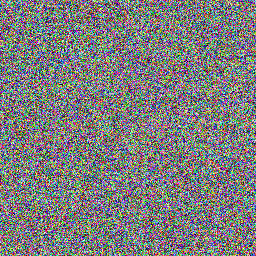

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 699/1000 [00:24<00:10, 29.61it/s]

'Image at step 700'

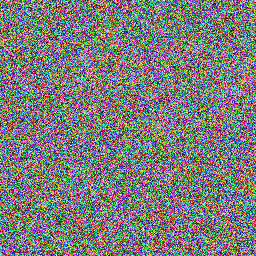

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 747/1000 [00:25<00:08, 29.61it/s]

'Image at step 750'

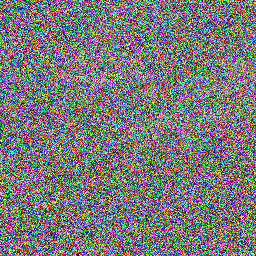

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 799/1000 [00:27<00:06, 29.61it/s]

'Image at step 800'

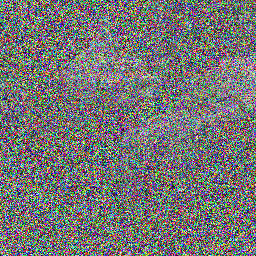

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 847/1000 [00:29<00:05, 29.61it/s]

'Image at step 850'

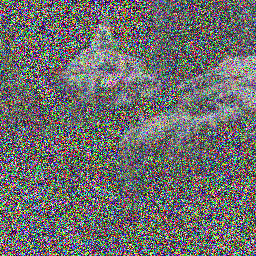

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 899/1000 [00:30<00:03, 29.61it/s]

'Image at step 900'

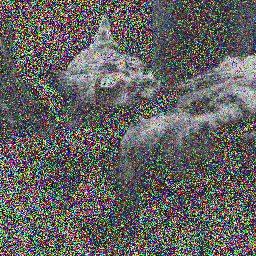

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 947/1000 [00:32<00:01, 29.61it/s]

'Image at step 950'

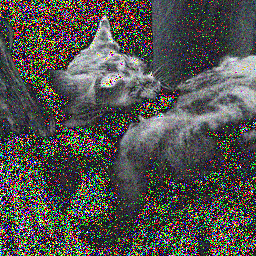

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [00:34<00:00, 29.61it/s]

'Image at step 1000'

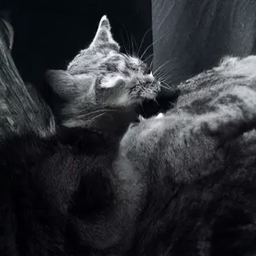

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.11it/s]


In [13]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 50 == 0:
        display_sample(sample, i + 1)